<a href="https://colab.research.google.com/github/belalE/NIH-Chest-X-rays/blob/main/NIH_Chest_X_ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NIH Chest X-ray Analysis

*Credits:*

Data provided by NIH Clinical Center

Xiaosong Wang, Yifan Peng, Le Lu, Zhiyong Lu, Mohammadhadi Bagheri, Ronald Summers, ChestX-ray8: Hospital-scale Chest X-ray Database and Benchmarks on Weakly-Supervised Classification and Localization of Common Thorax Diseases, IEEE CVPR, pp. 3462-3471, 2017

https://nihcc.app.box.com/v/ChestXray-NIHCC


In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import seaborn as sns # data visualization
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from PIL import Image, ImageDraw, ImageFont # editing and viewing images

## Importing Data

In [2]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NIH/BBox_List_2017.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'BBox_List_2017.csv'
df1.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis=1, inplace=True)
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 984 rows and 6 columns


In [3]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NIH/Data_Entry_2017_v2020.csv', delimiter=',')
df2.dataframeName = 'Data_Entry_2017.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 112120 rows and 11 columns


## Exploratory Data Analysis

### Bounding Boxes - Data Frame 1

In [9]:
df1.head(5)

,Image Index,Finding Label,Bbox [x,y,w,h]
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695


In [10]:
df1.describe()

,Bbox [x,y,w,h]
count,984.000000,984.000000,984.000000,984.000000
mean,398.806111,405.425364,256.334708,252.302547
std,222.700868,166.309995,167.629620,159.443635
min,5.417989,12.837934,27.306667,21.617778
25%,203.093333,293.869045,136.533333,115.674074
50%,340.249735,412.850794,214.340942,216.949153
75%,607.959365,521.641995,311.832381,367.902430
max,905.887831,876.980783,901.120000,873.379894


<Axes: xlabel='Finding Label', ylabel='count'>

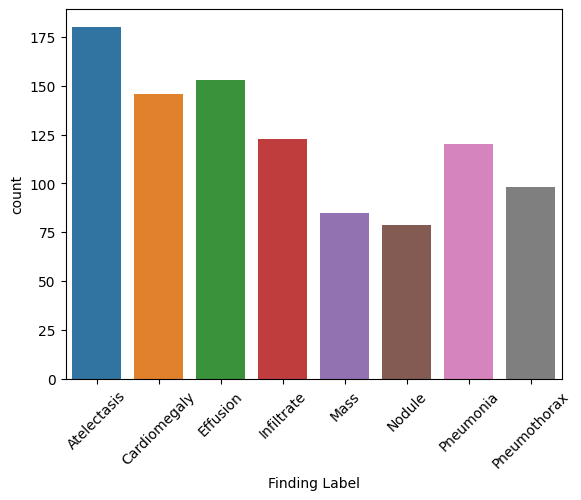

In [11]:
plt.xticks(rotation=45)
sns.countplot(x='Finding Label', data=df1)

In [12]:
sns.heatmap(df1.corr(), annot=True)

<ipython-input-12-b4ee83cc0a59>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(), annot=True)


<Axes: >

Error in callback <function flush_figures at 0x7feb74b11360> (for post_execute):


KeyboardInterrupt: ignored

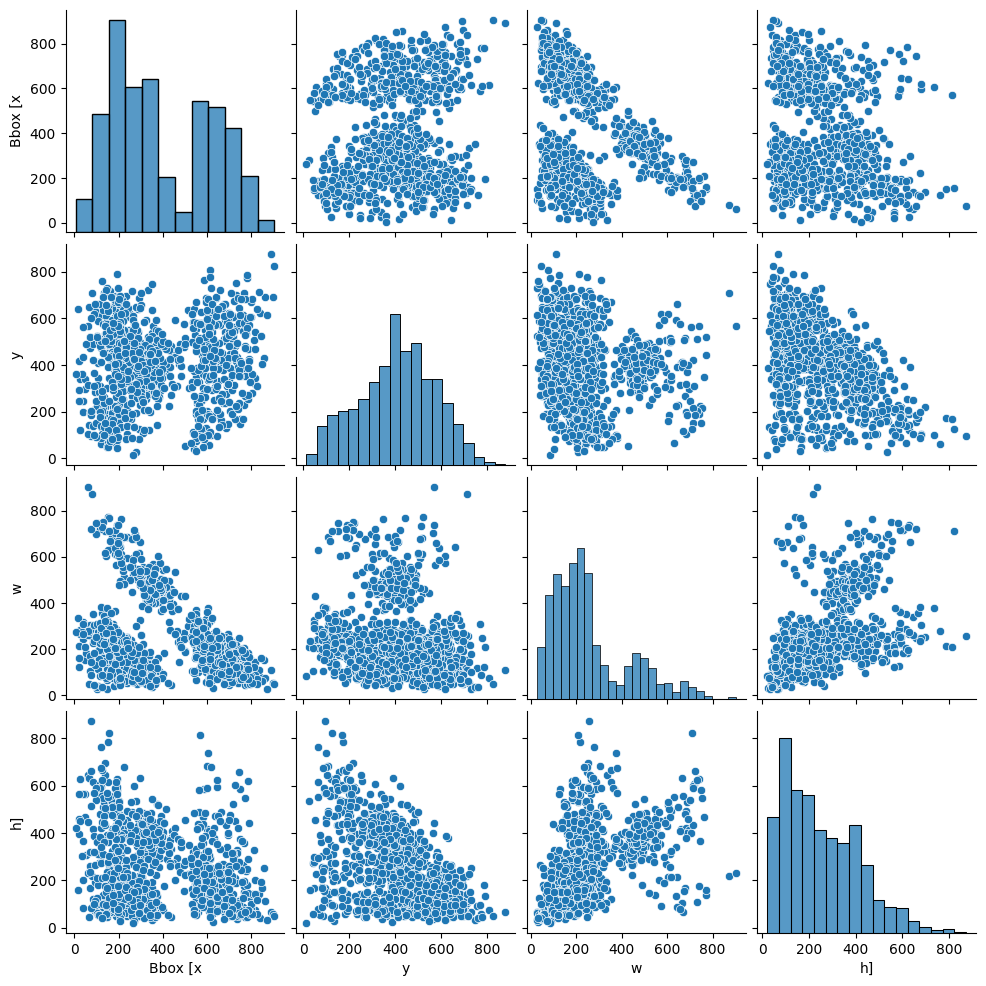

In [13]:
sns.pairplot(df1)

### Patient Data - Data Frame 2

In [ ]:
df2.head(5)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
0,00000001_000.png,Cardiomegaly,0,1,57,M,PA,2682,2749,0.143,0.143
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168
3,00000002_000.png,No Finding,0,2,80,M,PA,2500,2048,0.171,0.171
4,00000003_001.png,Hernia,0,3,74,F,PA,2500,2048,0.168,0.168


In [ ]:
df2.describe()

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000
mean,8.573751,14346.381743,46.626365,2646.078844,2486.438842,0.155649,0.155649
std,15.406320,8403.876972,16.602680,341.246429,401.268227,0.016174,0.016174
min,0.000000,1.000000,0.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,7310.750000,34.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,30805.000000,95.000000,3827.000000,4715.000000,0.198800,0.198800


In [ ]:
df2['Finding Labels'].nunique()

836

<Axes: xlabel='Patient Gender', ylabel='count'>

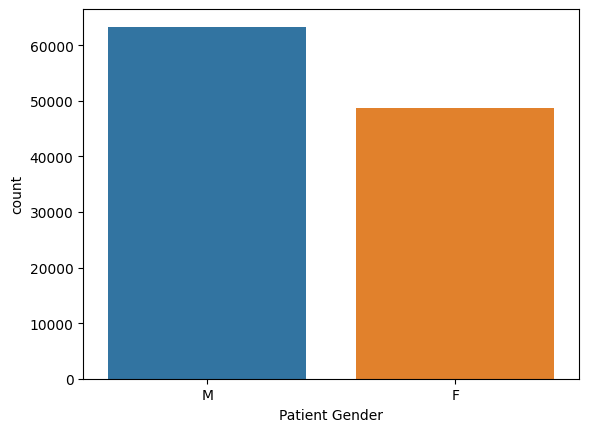

In [ ]:
sns.countplot(x='Patient Gender', data=df2)

<Axes: xlabel='View Position', ylabel='count'>

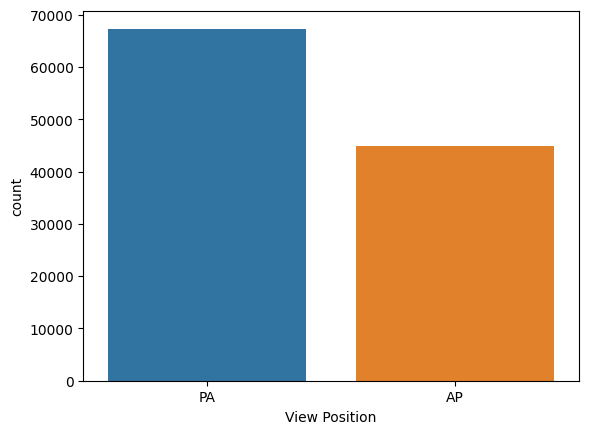

In [ ]:
sns.countplot(x='View Position', data=df2)

<Axes: xlabel='Patient Age', ylabel='Count'>

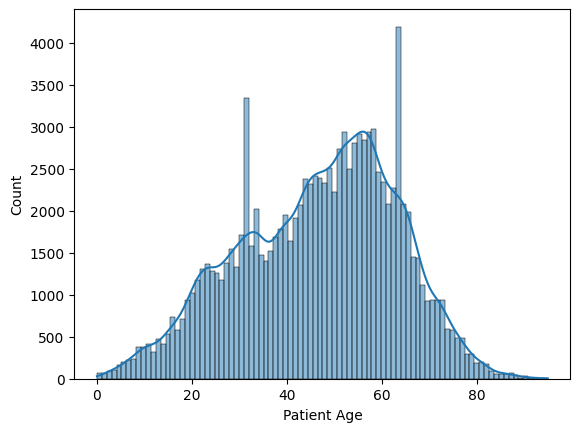

In [ ]:
sns.histplot(df2['Patient Age'], kde=True)

<Axes: xlabel='Follow-up #', ylabel='Count'>

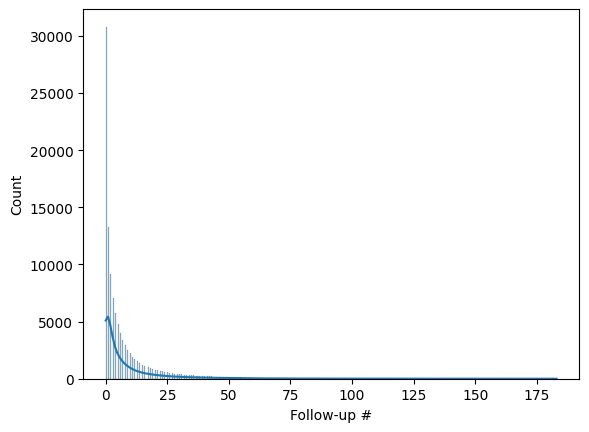

In [ ]:
sns.histplot(df2['Follow-up #'], kde=True)

<ipython-input-17-99dbc1571a0c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), annot=True)


<Axes: >

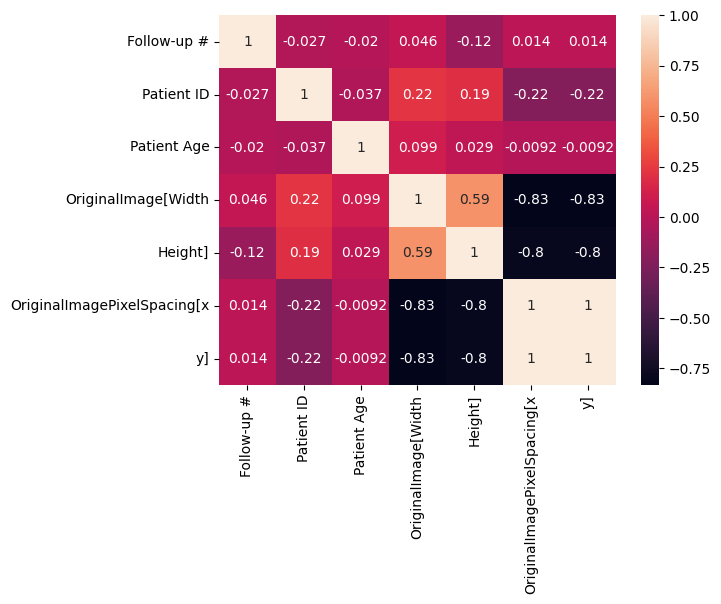

In [ ]:
sns.heatmap(df2.corr(), annot=True)

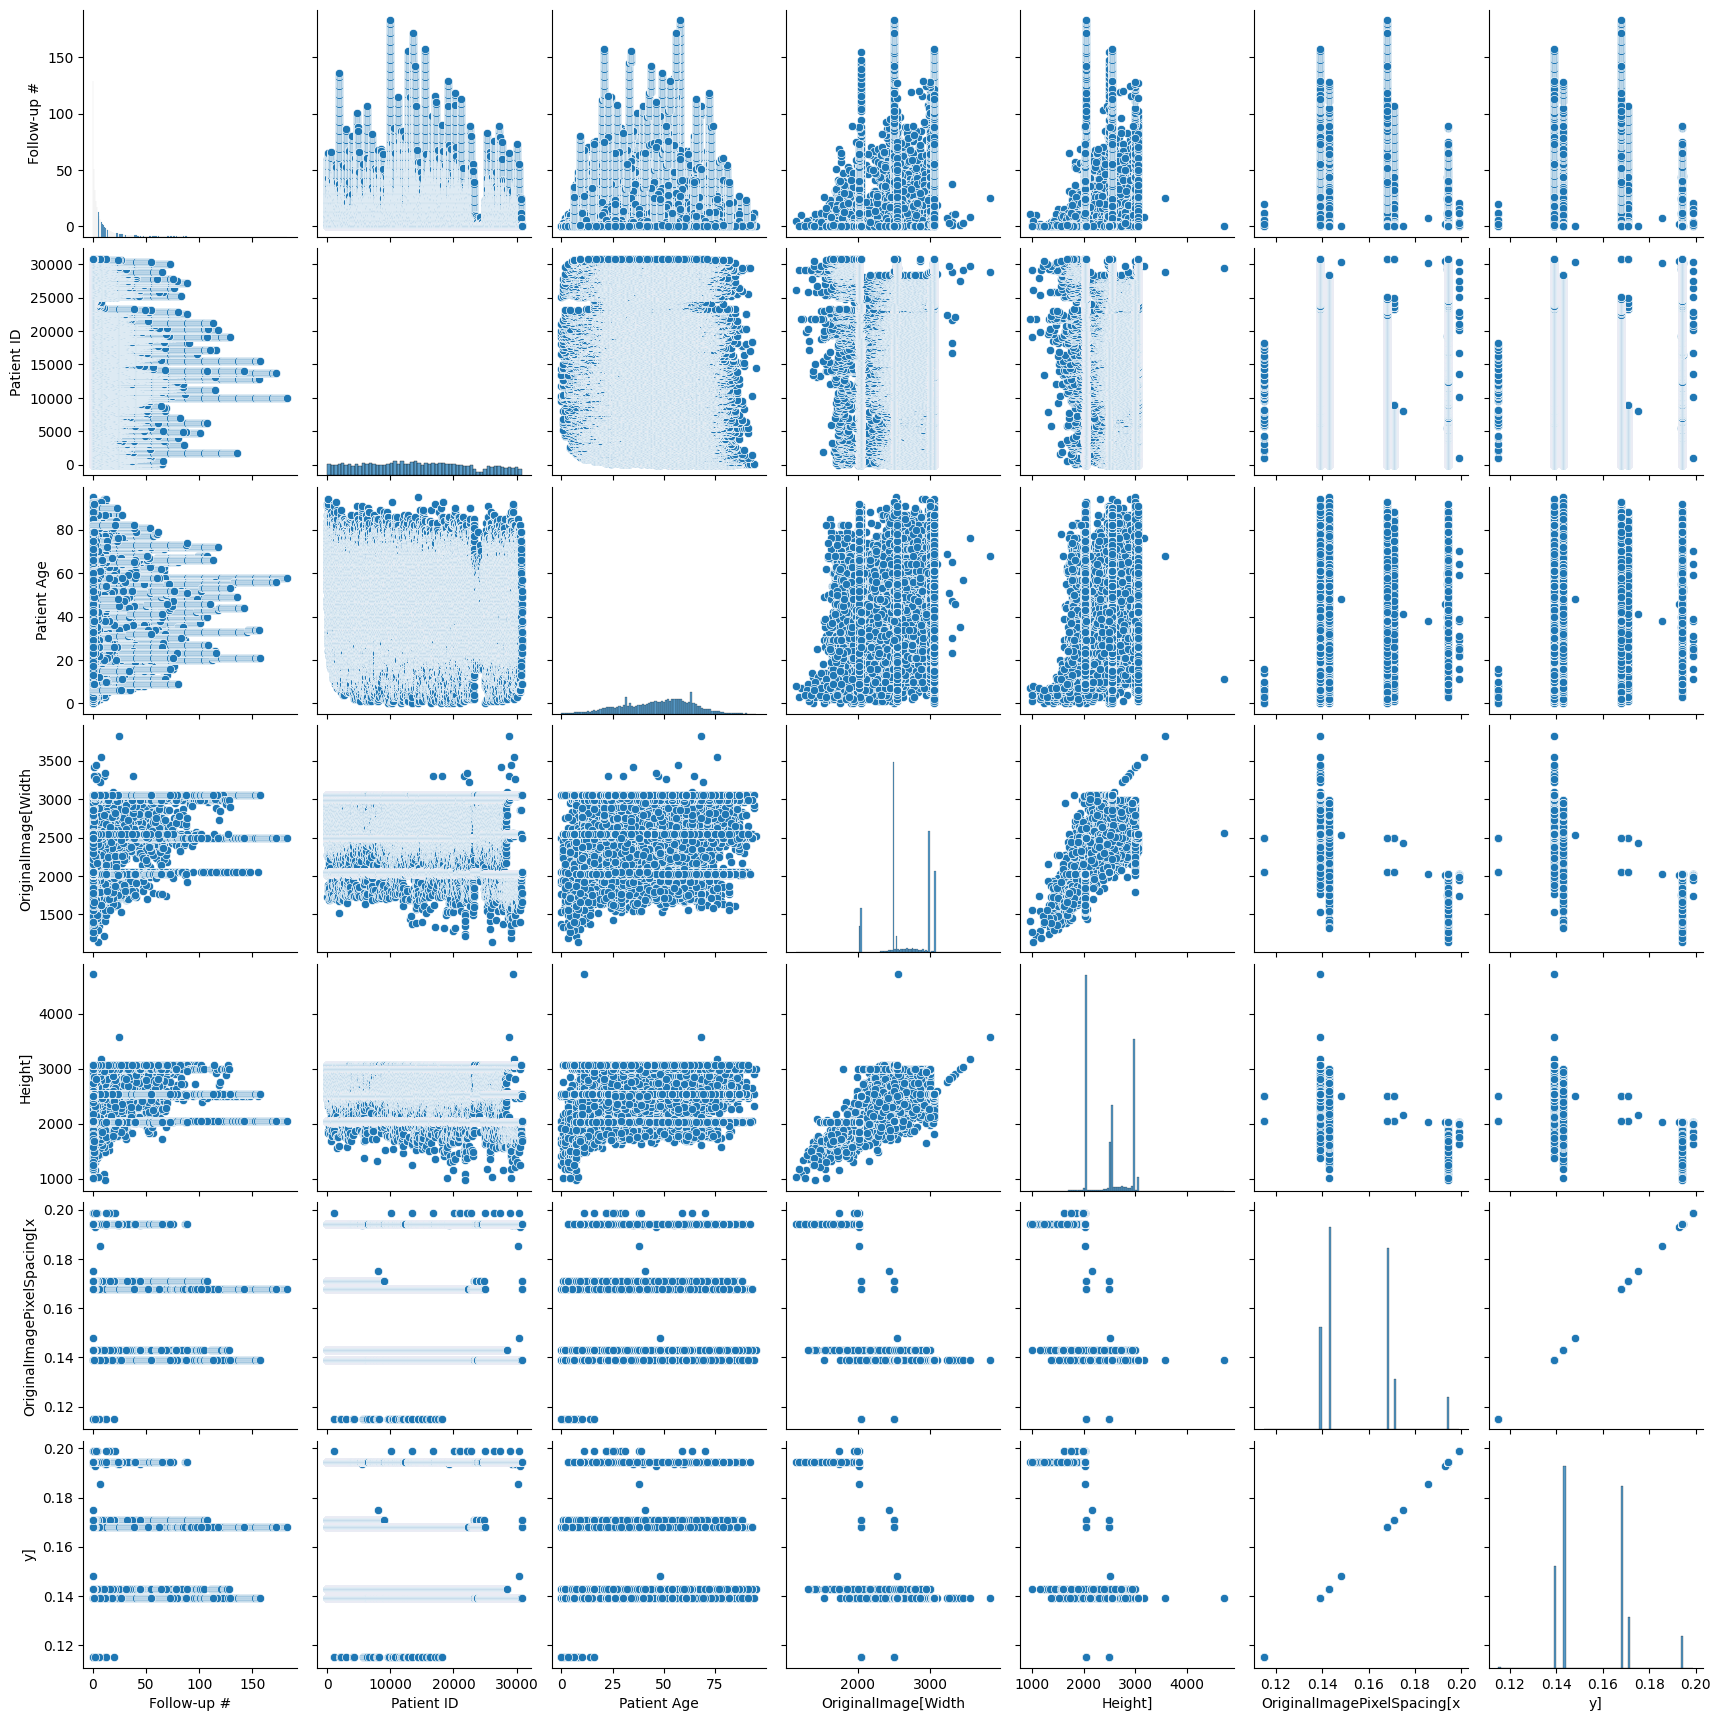

In [ ]:
sns.pairplot(df2)

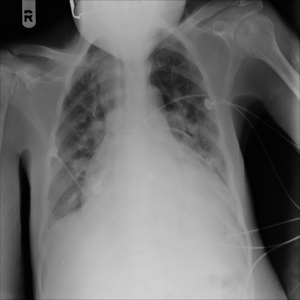

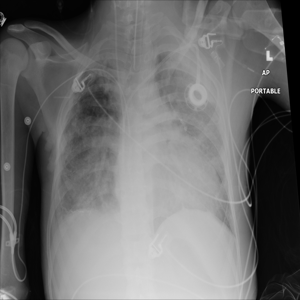

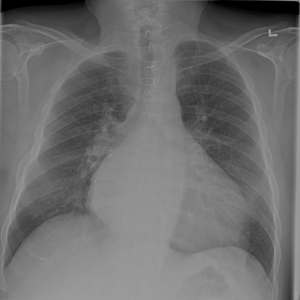

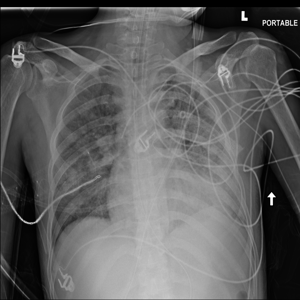

In [ ]:
imagepath = "/content/drive/MyDrive/Colab Notebooks/NIH/images/"
image_array = list(df1[df1['Finding Label']=='Cardiomegaly']['Image Index'].map(lambda x: imagepath + x).values)
for path in image_array[0:4]:
  display(Image.open(path).resize((300,300)))

### Drawing Bounding Box on Image

In [ ]:
font = ImageFont.truetype("/content/drive/MyDrive/Colab Notebooks/NIH/ARIAL.TTF",40)

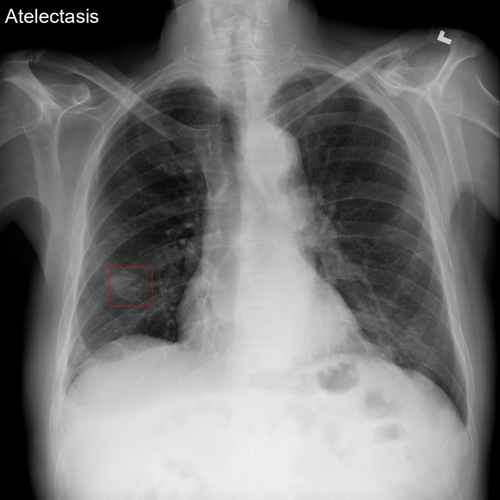

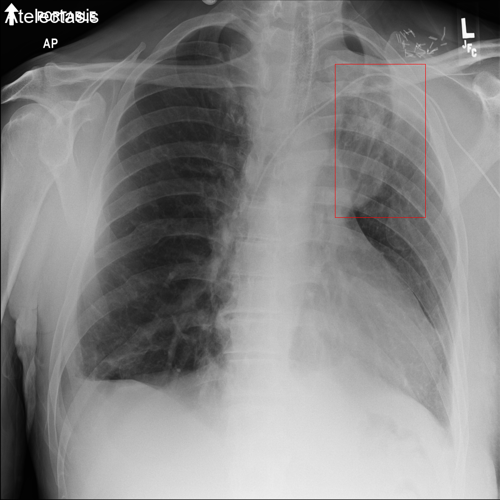

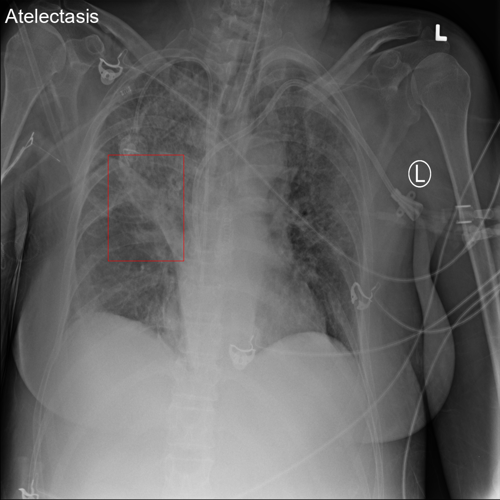

In [ ]:
for index, row in df1.head(3).iterrows():
  x0 = row['Bbox [x']
  x1 = row['Bbox [x'] + row['w']
  y0 = row['y']
  y1 = row['y'] + row['h]']

  start_point = (int(x0), int(y0))
  end_point = (int(x1), int(y1))
  file_name = imagepath + row['Image Index']

  source_img = Image.open(file_name).convert("RGBA")
  draw = ImageDraw.Draw(source_img)
  draw.rectangle((start_point, end_point), outline="red")
  draw.text((10, 10), row['Finding Label'], font=font)
  display(source_img.resize((500,500)))

  out_file = "output_" + str(index) + ".png"
  # source_img.save(out_file, "PNG")

## Adjusting Data

In [14]:
# Dividing Findings Label to different columns
indices = [96044, 63916, 1557]
for index in indices:
    findings = df2.iloc[index]['Finding Labels']
    labels = findings.split("|")
    print(labels)

['Atelectasis', 'Consolidation', 'Edema', 'Effusion', 'Infiltration', 'Mass', 'Nodule', 'Pleural_Thickening', 'Pneumonia']
['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Effusion', 'Infiltration', 'Nodule', 'Pleural_Thickening']
['Fibrosis', 'Infiltration', 'Nodule', 'Pneumonia']


In [15]:
def find_disease(row, disease):
  findings = row['Finding Labels']
  labels = findings.split("|")
  return (disease in labels)

In [16]:
df2['Atelectasis'] = df2.apply(lambda x: find_disease(x, "Atelectasis"), axis=1)
df2['Consolidation'] = df2.apply(lambda x: find_disease(x, "Consolidation"), axis=1)
df2['Infiltration'] = df2.apply(lambda x: find_disease(x, "Infiltration"), axis=1)
df2['Pneumothorax'] = df2.apply(lambda x: find_disease(x, "Pneumothorax"), axis=1)
df2['Edema'] = df2.apply(lambda x: find_disease(x, "Edema"), axis=1)
df2['Emphysema'] = df2.apply(lambda x: find_disease(x, "Emphysema"), axis=1)
df2['Fibrosis'] = df2.apply(lambda x: find_disease(x, "Fibrosis"), axis=1)
df2['Effusion'] = df2.apply(lambda x: find_disease(x, "Effusion"), axis=1)
df2['Pneumonia'] = df2.apply(lambda x: find_disease(x, "Pneumonia"), axis=1)
df2['Pleural_Thickening'] = df2.apply(lambda x: find_disease(x, "Pleural_Thickening"), axis=1)
df2['Cardiomegaly'] = df2.apply(lambda x: find_disease(x, "Cardiomegaly"), axis=1)
df2['Nodule'] = df2.apply(lambda x: find_disease(x, "Nodule"), axis=1)
df2['Mass'] = df2.apply(lambda x: find_disease(x, "Mass"), axis=1)
df2['Hernia'] = df2.apply(lambda x: find_disease(x, "Hernia"), axis=1)

<Axes: >

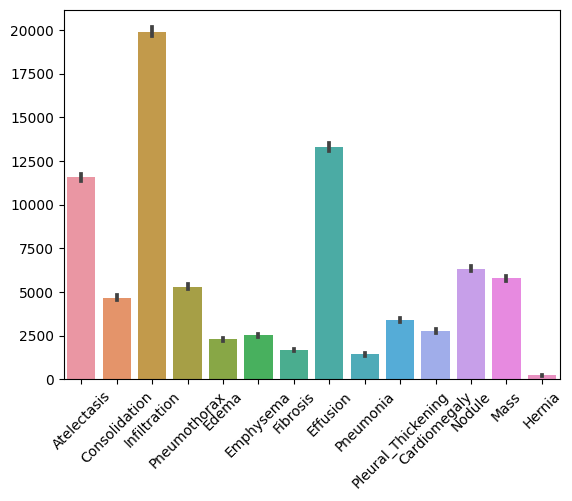

In [17]:
disease_list = ["Atelectasis", "Consolidation", "Infiltration", "Pneumothorax", "Edema", "Emphysema", "Fibrosis", "Effusion", "Pneumonia", "Pleural_Thickening","Cardiomegaly", "Nodule", "Mass","Hernia"]
plt.xticks(rotation=45)
sns.barplot(df2[disease_list], estimator=sum)

## Convolutional Neural Network

**Things to Research**
* U-net
* Image Segmentation
* GPU - Hardware Accelerator

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import cv2
import tensorflow as tf

### Importing Images and Fixing Sizes

In [19]:
train_val_list = open('/content/drive/MyDrive/Colab Notebooks/NIH/train_val_list.txt', "r").read().split('\n')
test_list = open('/content/drive/MyDrive/Colab Notebooks/NIH/test_list.txt', "r").read().split('\n')

In [ ]:
# Resize Image
# https://wandb.ai/ayush-thakur/dl-question-bank/reports/How-to-Handle-Images-of-Different-Sizes-in-a-Convolutional-Neural-Network--VmlldzoyMDk3NzQ
# https://datascience.stackexchange.com/questions/40462/how-to-prepare-the-varied-size-input-in-cnn-prediction
# https://ai.stackexchange.com/questions/6274/how-can-i-deal-with-images-of-variable-dimensions-when-doing-image-segmentation

'\n11\n\nConventionally, when dealing with images of different sizes in CNN(which happens very often in real world problems), we resize the images to the size of the smallest images with the help of any image manipulation library (OpenCV, PIL etc) or some times, pad the images of unequal size to desired size. Resizing the image is simpler and is used most often.\n\nAs mentioned by Media in the above answer, it is not possible to directly use images of different sizes. It is because when you define a CNN architecture, you plan as to how many layers you should have depending on the input size. Without having a fixed input shape, you cannot define architecture of your model. It is therefore necessary to convert all your images to same size. \n'

<Axes: xlabel='OriginalImage[Width', ylabel='Count'>

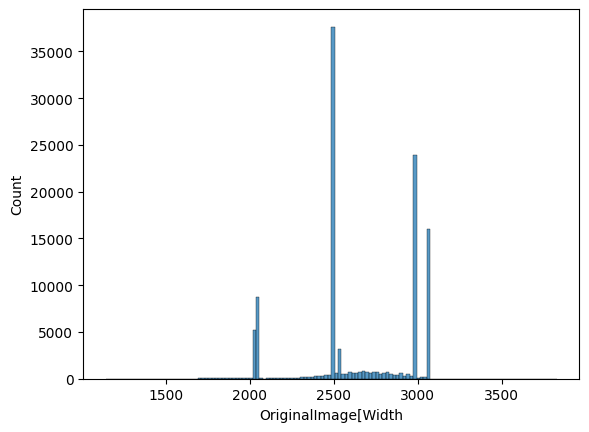

In [20]:
sns.histplot(df2['OriginalImage[Width'])

<Axes: xlabel='Height]', ylabel='Count'>

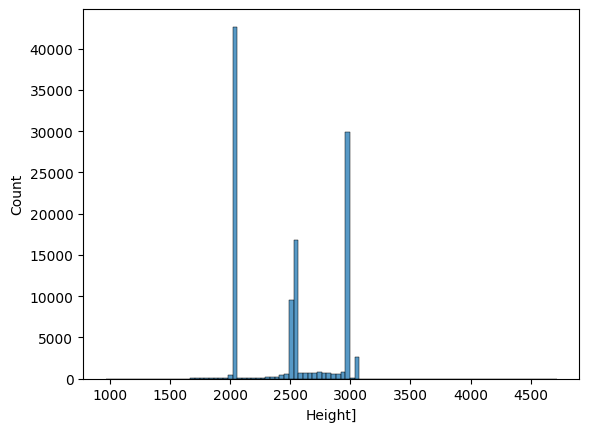

In [21]:
sns.histplot(df2['Height]'])

In [26]:
df2[(df2['OriginalImage[Width']==2500) & (df2['Height]']==2048)].count()['Image Index']

37153

### Creating Vector for Disease Findings

In [ ]:
# Need to create vector for answers

### Building Model

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation=tf.nn.relu),
#     tf.keras.layers.Dense(14, activation=tf.nn.softmax)
# ])

In [ ]:
# model.summary()